In [1]:
import matplotlib.pyplot as plt
import cv2
import json

In [2]:
image = cv2.imread('D:/Code/Other/Data/000230.png')
image2=image[:,:,[2,1,0]]
print(image2.shape)

(368, 1216, 3)


In [3]:
image_cut = cv2.imread('D:/Code/Other/Data/000230_cutout.png')
image2_cut=image_cut[:,:,[2,1,0]]
print(image2.shape)

(368, 1216, 3)


In [4]:
with open("D:/Code/Other/Data/000230.json", "r", encoding="utf-8") as f:
    content = json.load(f)

(0.0, 1216.0, 0.0, 368.0)

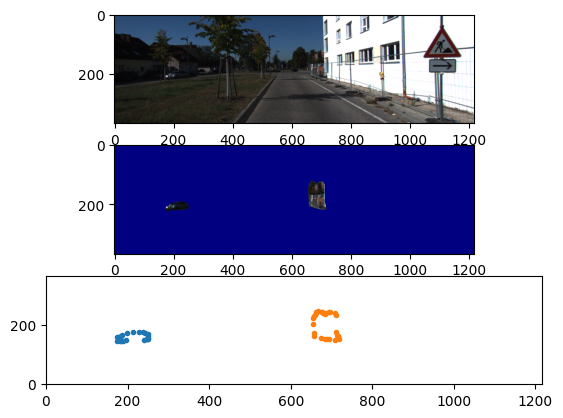

In [5]:
plt.subplot(311)
plt.imshow(image2)
plt.subplot(312)
plt.imshow(image2_cut)
ax = plt.subplot(313)
ax.plot([i[0] for i in content[0]['points']],[368-i[1] for i in content[0]['points']],'.')
ax.plot([i[0] for i in content[1]['points']],[368-i[1] for i in content[1]['points']],'.')
ax.axis([0,1216,0,368])

In [6]:
def IsInside(x,content):
    for i in range(len(content)):
        temp = IsPointInConvexPolygon(content[i]['points'], x)
        if temp == 1:
            return 1
    return 0

In [13]:
def isRayIntersectsSegment(poi,s_poi,e_poi): #[x,y] [lng,lat]
    #输入：判断点，边起点，边终点，都是[lng,lat]格式数组
    if s_poi[1]==e_poi[1]: #排除与射线平行、重合，线段首尾端点重合的情况
        return False
    if s_poi[1]>poi[1] and e_poi[1]>poi[1]: #线段在射线上边
        return False
    if s_poi[1]<poi[1] and e_poi[1]<poi[1]: #线段在射线下边
        return False
    if s_poi[1]==poi[1] and e_poi[1]>poi[1]: #交点为下端点，对应spoint
        return False
    if e_poi[1]==poi[1] and s_poi[1]>poi[1]: #交点为下端点，对应epoint
        return False
    if s_poi[0]<poi[0] and e_poi[0]<poi[0]: #线段在射线左边
        return False

    xseg=e_poi[0]-(e_poi[0]-s_poi[0])*(e_poi[1]-poi[1])/(e_poi[1]-s_poi[1]) #求交
    if xseg<poi[0]: #交点在射线起点的左侧
        return False
    return True  #排除上述情况之后

def isPoiWithinPoly(poi,poly):
    #输入：点，多边形三维数组
    #poly=[[[x1,y1],[x2,y2],……,[xn,yn],[x1,y1]],[[w1,t1],……[wk,tk]]] 三维数组

    #可以先判断点是否在外包矩形内 
    #if not isPoiWithinBox(poi,mbr=[[0,0],[180,90]]): return False
    #但算最小外包矩形本身需要循环边，会造成开销，本处略去
    sinsc=0 #交点个数
    for i,epoly in enumerate(poly): #循环每条边的曲线->each polygon 是二维数组[[x1,y1],…[xn,yn]]
        s_poi=epoly
        if i == len(poly)-1:
            e_poi=poly[0]
        else:
            e_poi=poly[i+1]
        if isRayIntersectsSegment(poi,s_poi,e_poi):
            sinsc+=1 #有交点就加1

    return 1 if sinsc%2==1 else  0

def IsInside(x,content):
    for i in range(len(content)):
        temp = isPoiWithinPoly(x,content[i]['points'])
        if temp == 1:
            return 1
    return 0

In [14]:
result = []
for i in range(1216):
    for j in range(368):
        if IsInside([i,j],content) ==1:
            result.append([i,j])

(0.0, 1216.0, 0.0, 368.0)

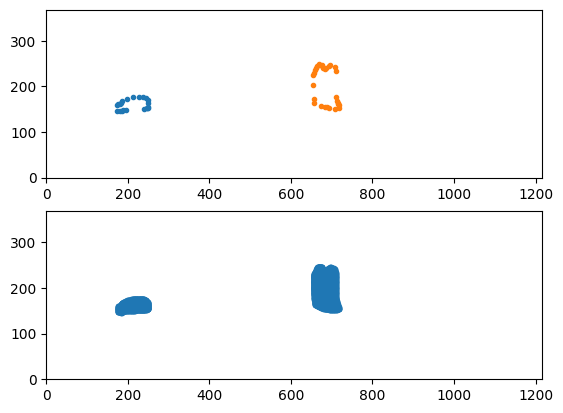

In [15]:
ax = plt.subplot(211)
ax.plot([i[0] for i in content[0]['points']],[368-i[1] for i in content[0]['points']],'.')
ax.plot([i[0] for i in content[1]['points']],[368-i[1] for i in content[1]['points']],'.')
ax.axis([0,1216,0,368])
plt.subplot(212)
plt.plot([i[0] for i in result],[368-i[1] for i in result],'.')
plt.axis([0,1216,0,368])